In [1]:
%matplotlib inline
import betterplotlib as bpl
from pathlib import Path
from astropy import table
import numpy as np

bpl.set_style()

In [2]:
catalog_paths = []
data_dir = Path("../data/").resolve()
for cluster_dir in data_dir.iterdir():
    if cluster_dir.is_dir():
        cat = cluster_dir / "size" / "final_catalog_30.txt"
        if cat.exists():
            catalog_paths.append(cat)

In [3]:
catalogs = [table.Table.read(str(c), format="ascii.ecsv") for c in catalog_paths]

Then stack them together into one master catalog.

In [4]:
big_catalog = table.vstack(catalogs, join_type="inner")

First just plot all the a parmeters in pixels.

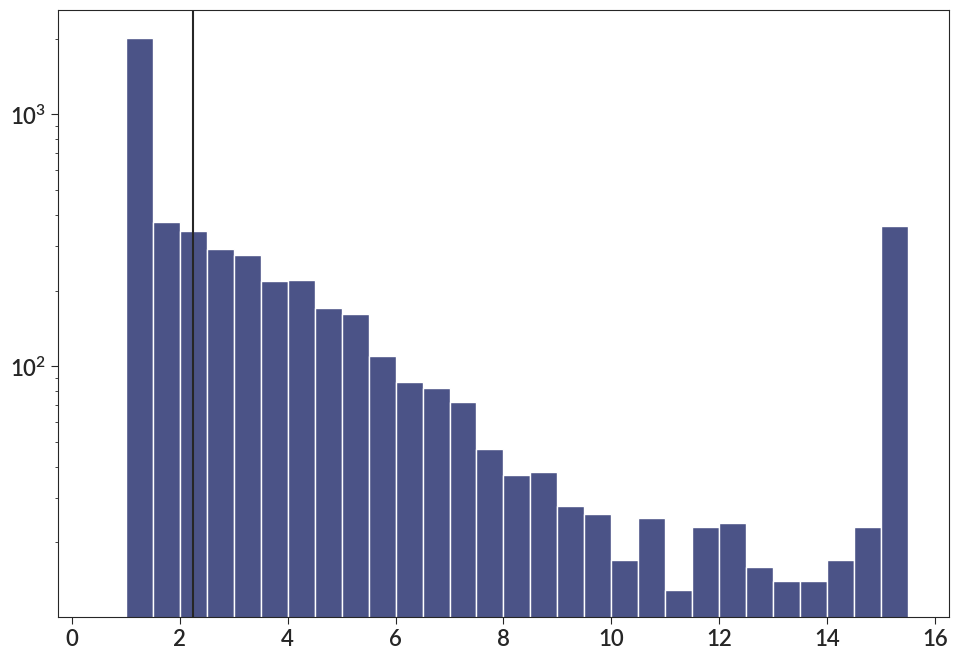

In [5]:
fig, ax = bpl.subplots()
ax.hist(big_catalog["scale_radius_pixels_best"], bin_size=0.5)
ax.set_yscale("log")
ax.axvline(np.median(big_catalog["scale_radius_pixels_best"]))

Then restrict it to etas that are the issue here.

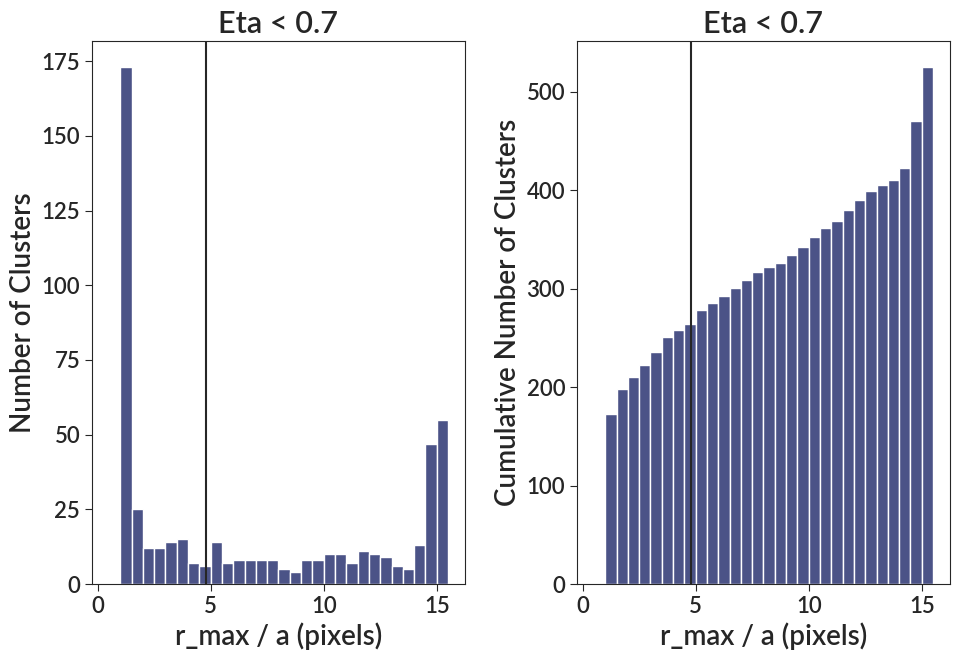

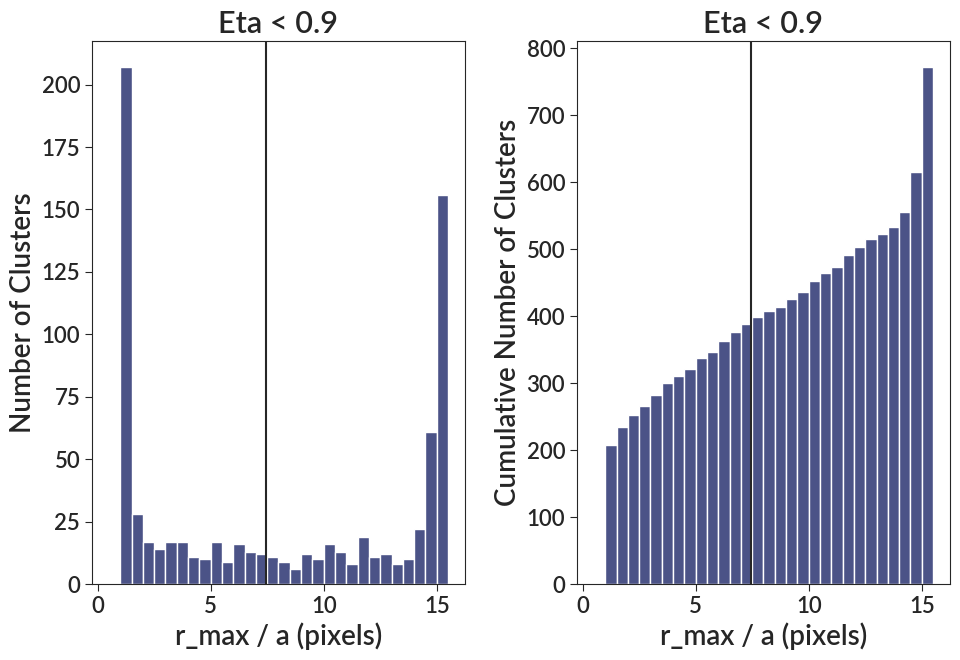

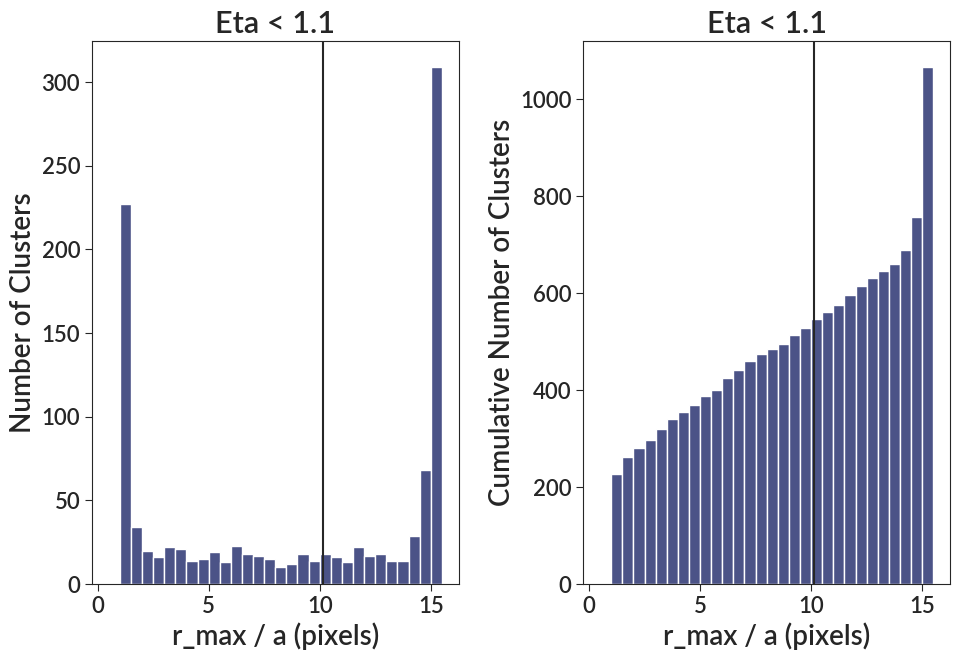

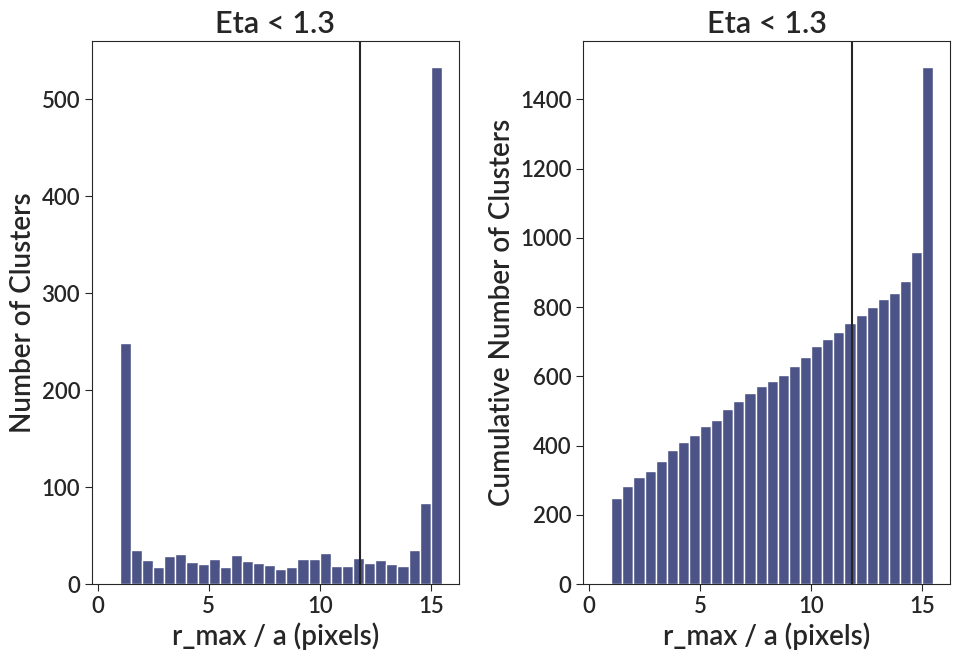

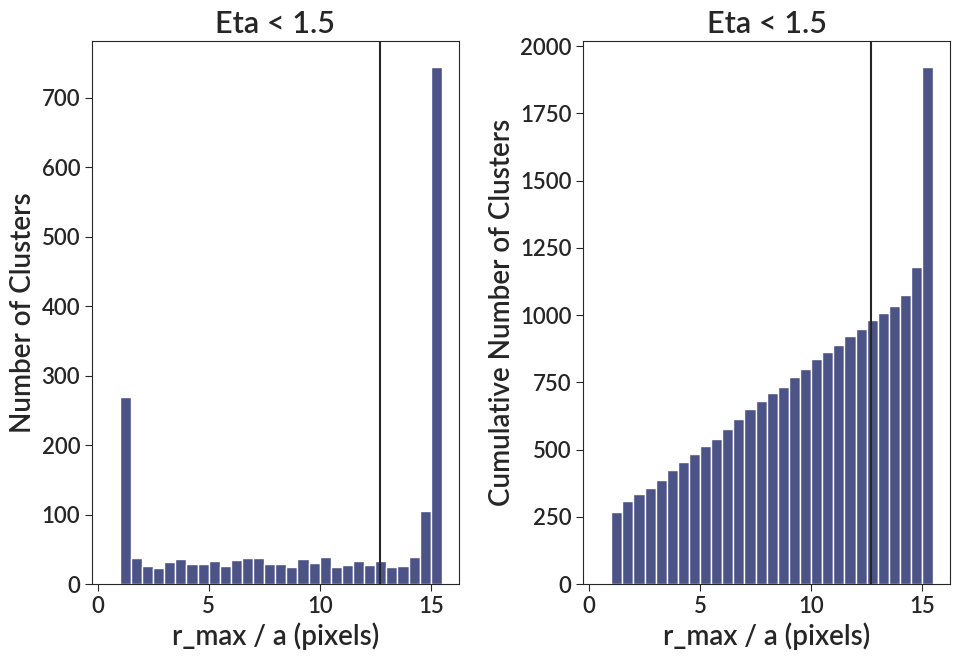

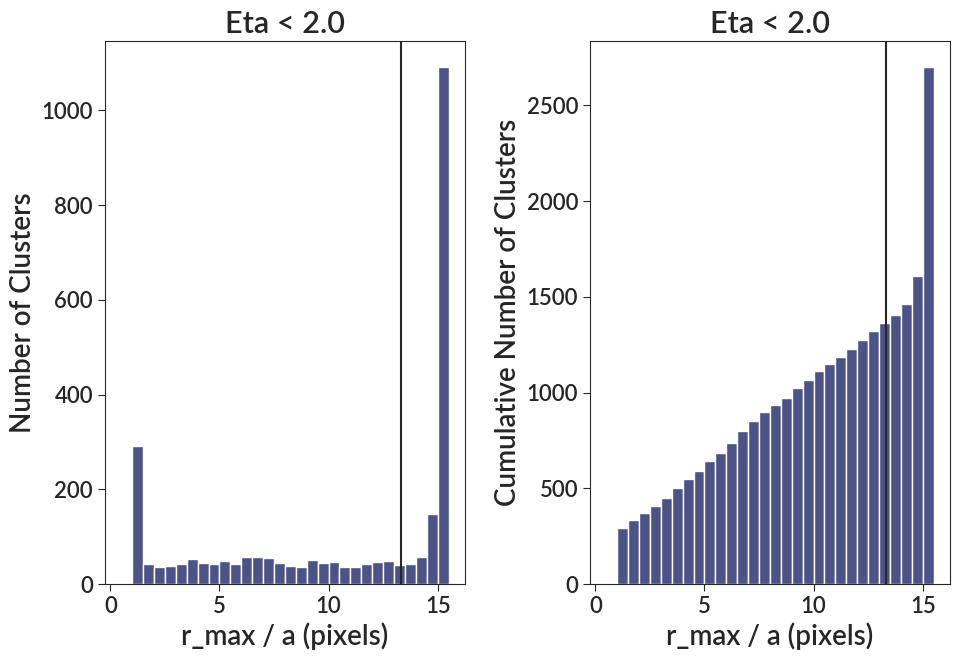

In [13]:
boundaries = [0.7, 0.9, 1.1, 1.3, 1.5, 2.0]
for boundary in boundaries:
    good_idx = big_catalog["power_law_slope_best"] < boundary
    r_over_a = 15 / big_catalog["scale_radius_pixels_best"][good_idx]

    fig, axs = bpl.subplots(ncols=2)
    
    axs[0].hist(r_over_a, bin_size=0.5)
    axs[1].hist(r_over_a, bin_size=0.5, cumulative=True)
    
    axs[0].axvline(np.median(r_over_a))
    axs[0].add_labels("r_max / a (pixels)", "Number of Clusters", f"Eta < {boundary}")
    
    axs[1].axvline(np.median(r_over_a))
    axs[1].add_labels("r_max / a (pixels)", "Cumulative Number of Clusters", f"Eta < {boundary}")